In [4]:
CIFAR_DIR = 'cifar-10-batches/'

In [6]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding= 'bytes')
    return cifar_dict

In [9]:
pip install tensorflow


ERROR: Exception:
Traceback (most recent call last):
  File "c:\python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "c:\python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "c:\python310\lib\ssl.py", line 1273, in recv_into
    return self.read(nbytes, buffer)
  File "c:\python310\lib\ssl.py", line 1129, in read
    return self._sslobj.read(len, buffer)
TimeoutError: The read operation timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\python310\lib\site-packages\pip

In [11]:
pip show tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

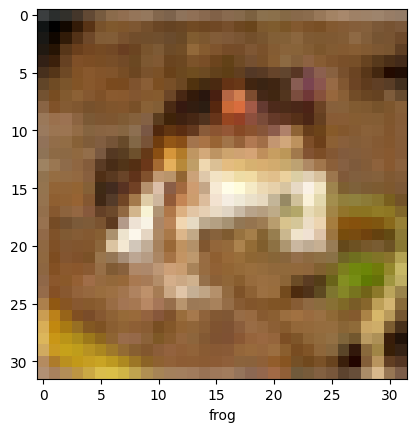

In [14]:
plot_sample(x_train, y_train, 0)

In [7]:
#pixel value ranges from 0 to 255 in each channel of RGB.
#dividing the values by 255 to normalise each value in the range of 0 to 1
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
!pip install scikit-learn

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 177s 110ms/step - loss: 1.8120 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.6242 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.5454 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 140s 89ms/step - loss: 1.4864 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4322 - accuracy: 0.4985


In [12]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 10s 21ms/step - loss: 1.4515 - accuracy: 0.4872


[1.451460599899292, 0.487199991941452]

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n" , classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.52      0.56      1000
           1       0.67      0.52      0.58      1000
           2       0.45      0.26      0.33      1000
           3       0.35      0.37      0.36      1000
           4       0.46      0.36      0.40      1000
           5       0.48      0.25      0.33      1000
           6       0.49      0.63      0.55      1000
           7       0.43      0.71      0.53      1000
           8       0.67      0.55      0.60      1000
           9       0.42      0.72      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [16]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4886 - accuracy: 0.4635
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1255 - accuracy: 0.6037
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9907 - accuracy: 0.6560
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9160 - accuracy: 0.6837
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8529 - accuracy: 0.7042
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8029 - accuracy: 0.7219
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7612 - accuracy: 0.7361
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7259 - accuracy: 0.7486
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6899 - accuracy: 0.7606
Epoch 10/10
1563/1563 [==============================] - 40s 26m

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9529 - accuracy: 0.6968


[0.9529155492782593, 0.6967999935150146]

In [20]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [21]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [23]:
plot_sample(X_test, y_test, 1)

NameError: name 'plot_sample' is not defined

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[1.39664067e-02, 3.32059618e-03, 2.26403750e-03, 5.02301812e-01,
        2.41708025e-04, 9.82877687e-02, 8.34379112e-04, 1.84968102e-03,
        3.63591760e-01, 1.33418096e-02],
       [9.10683256e-03, 6.13783672e-02, 3.25997888e-07, 3.60733537e-07,
        1.25993074e-06, 1.98984708e-07, 4.39769856e-08, 7.95075175e-06,
        9.21756983e-01, 7.74770556e-03],
       [1.67836815e-01, 5.75192094e-01, 3.36912373e-04, 2.74033519e-03,
        4.09687927e-04, 5.51216479e-04, 1.20827804e-04, 3.49355559e-03,
        1.09882288e-01, 1.39436334e-01],
       [8.57280314e-01, 1.98225379e-02, 7.19817961e-03, 8.42726658e-05,
        2.73309951e-03, 4.26083679e-05, 1.69632822e-05, 1.29745662e-04,
        1.11332491e-01, 1.35980139e-03],
       [3.46171760e-06, 1.11449801e-03, 2.67208125e-02, 4.70856577e-02,
        6.54083967e-01, 1.53386476e-03, 2.69429356e-01, 1.22210431e-05,
        8.30636782e-06, 7.85307566e-06]], dtype=float32)

In [25]:
np.argmax(y_pred[0])

3

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [31]:
plot_sample(X_test, y_test, 2)

NameError: name 'plot_sample' is not defined

In [32]:
classes[y_classes[2]]

NameError: name 'classes' is not defined